
# 📊 Data Analysis for Student Performance Prediction

## 🔍 Overview
This Jupyter Notebook performs an **exploratory data analysis (EDA)** on the *Students Performance Dataset*. 
It is designed to provide insights into student performance based on various factors, such as study habits, parental involvement, and demographic attributes.

This analysis will help in building models for:
1. **User Story 1: Supervised Learning Model** – Predicting a student’s likelihood of passing based on study habits and past scores.
2. **User Story 2: Clustering Model** – Grouping students based on learning styles for personalized teaching strategies.

[Capstone Project: Kaggle Notebook Link](https://www.kaggle.com/code/rafaelomarhidalgo/capstone-project-building-ai-powered-solutions)


---



## 📦 Step 1: Importing Required Libraries
We begin by importing essential Python libraries:
- **pandas** and **numpy** for data manipulation.
- **matplotlib** and **seaborn** for visualization.


In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 📂 Step 2: Loading the Dataset
The dataset is read into a pandas DataFrame for analysis.


In [2]:

# Load the dataset
file_path = "/kaggle/input/students-performance-dataset/Student_performance_data _.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0



## 📝 Step 3: Understanding the Data
Let's explore the dataset structure, including:
- Column names and data types.
- Presence of missing values.
- Basic statistical summary.


In [3]:

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB

Missing 

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000



## 🎭 Step 4: Exploring Categorical Features
Examining the unique values in categorical columns to understand their distribution.


In [4]:

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")



Unique values in categorical columns:



## 📊 Step 5: Visualizing Numerical Features
Understanding the distribution of numerical variables helps in feature selection and preprocessing.


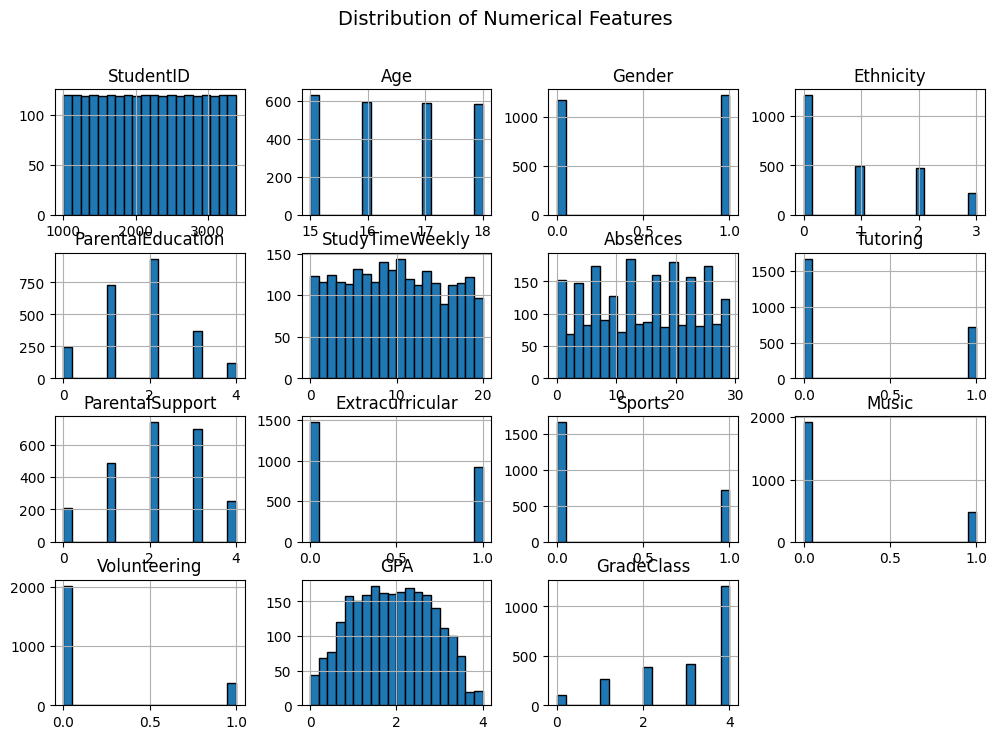

In [5]:

# Visualize the distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()



## 🔗 Step 6: Correlation Analysis
A heatmap of the correlation matrix helps identify relationships between numerical features.


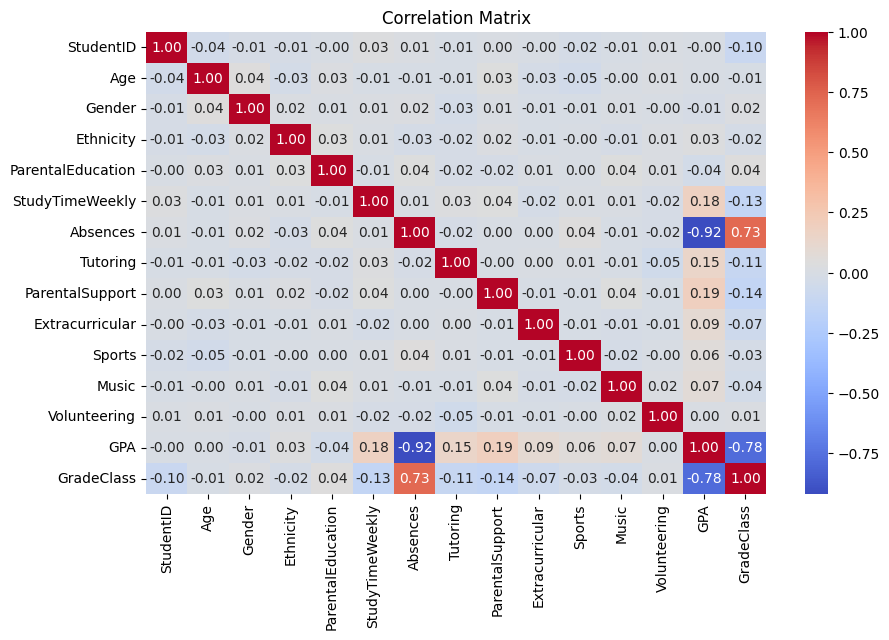

In [6]:

# Check correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



## 📊 Step 7: Visualizing Categorical Features
We analyze categorical variables using **count plots** to understand student distribution across different categories.


In [7]:

# Countplot for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()



## 🔄 Step 8: Encoding Categorical Variables for Model Training
Machine learning models require numerical input. We convert categorical variables into **dummy variables** using one-hot encoding.


In [8]:

# Encoding categorical variables for model training (if needed)
df_encoded = pd.get_dummies(df, drop_first=True)

# Display encoded dataset
print("\nEncoded Dataset Sample:")
display(df_encoded.head())



Encoded Dataset Sample:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### **📌 Next Steps**

Once we analyze the dataset, the next step is:

-   **Feature Selection:** Identify relevant features for prediction (study habits, past scores, tutoring, etc.).
-   **Define Target Variable:** Convert grades into a **binary pass/fail** label for classification.
-   **Build ML Models:** Start with **Logistic Regression** for prediction and **K-Means Clustering** for student grouping.





### **📌 Machine Learning Model: Predicting Student GPA Using Random Forest Regression**

This notebook presents a **structured approach** to predicting **student GPA** using a **Random Forest Regressor**. The goal is to leverage **student demographic data, study habits, and extracurricular activities** to build a model that accurately predicts GPA.

* * *

## **🔹 Step 1: Load & Explore Dataset**



In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")  # Replace with actual file path if needed

# Display dataset overview
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### **📌 Description:**

-   The dataset contains **student demographic details, study habits, extracurricular activities, and academic performance**.
-   **Target Variable**: `GPA`
-   **Features**: **Categorical & Continuous variables** representing student attributes.

***

## **🔹 Step 2: Data Cleaning & Preprocessing**

### **🔹 Drop Unnecessary Columns**



In [ ]:
# Drop unnecessary columns
df = df.drop(columns=["StudentID", "GradeClass"])  # Drop StudentID (not useful) & GradeClass (too correlated)

### **📌 Why?**

-   **`StudentID`** is just an identifier and does not contribute to GPA prediction.
-   **`GradeClass`** is a categorical representation of GPA (too correlated), which could lead to **data leakage**.



## **🔹 Step 3: Identify Categorical & Continuous Features**

In [ ]:
# Identify categorical and continuous features
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport", 
                        "Extracurricular", "Sports", "Music", "Volunteering"]
continuous_features = ["Age", "StudyTimeWeekly", "Absences"]

### **📌 Why This Matters?**

-   **Categorical features** need to be converted into numerical values.
-   **Continuous features** can be used directly in the model.

* * *

## **🔹 Step 4: Encode Categorical Variables**

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
for col in categorical_features:
    if df[col].nunique() <= 10:  # If a categorical variable has a few unique values
        df_encoded[col] = df_encoded[col].astype("category").cat.codes  # Label Encoding
    else:
        one_hot = pd.get_dummies(df_encoded[col], prefix=col)  # One-Hot Encoding for high-cardinality categorical features
        df_encoded = df_encoded.drop(col, axis=1).join(one_hot)

### **📌 Encoding Approach**

✅ **Label Encoding** for categorical features with **few unique values** (e.g., Gender, Tutoring).  
✅ **One-Hot Encoding** for categorical features with **many unique values** to avoid ordinal relationships.

* * *

## **🔹 Step 5: Define Features & Target Variable**

In [ ]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["GPA"])
y = df_encoded["GPA"]

**📌 Why?**

-   **`X` contains all student attributes** (predictors).
-   **`y` is the GPA we want to predict.**

* * *


## **🔹 Step 6: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset dimensions
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

### **📌 Why?**

✅ **80% of the data is used to train the model** for learning patterns.  
✅ **20% is kept for testing** to evaluate how well the model generalizes.

* * *

## **🔹 Step 7: Train the Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_regressor.fit(X_train, y_train)

### **📌 Why Random Forest?**

✅ **Handles both categorical & continuous data well**  
✅ **Resistant to overfitting** due to its ensemble nature  
✅ **Performs feature selection automatically**

## **🔹 Step 8: Make Predictions**



In [ ]:
# Predictions
y_pred = rf_regressor.predict(X_test)

### **📌 Why This Matters?**

-   The trained model predicts **GPA for unseen students**.
-   These predictions will be evaluated to measure **model accuracy**.

* * *

## **🔹 Step 9: Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Training Set: (1913, 12), Testing Set: (479, 12)
Mean Squared Error: 0.0605
R² Score: 0.9268


### **📌 How To Interpret Results?**

-   **Mean Squared Error (MSE)** → Measures **prediction error** (lower is better).
-   **R² Score** → Indicates **how well the model explains GPA variance** (closer to 1 is better).

* * *

## **🔹 Step 10: Feature Importance Analysis**

In [11]:
importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


              Feature  Importance
5            Absences    0.853966
4     StudyTimeWeekly    0.057927
7     ParentalSupport    0.032007
6            Tutoring    0.014447
8     Extracurricular    0.007837
9              Sports    0.007226
0                 Age    0.006362
3   ParentalEducation    0.006264
2           Ethnicity    0.005509
10              Music    0.003989
1              Gender    0.002470
11       Volunteering    0.001998


### **🔹 Hyperparameter Optimization with GridSearchCV**

To enhance the predictive performance of our **Random Forest Regressor**, we employ **Grid Search Cross-Validation (GridSearchCV)** to systematically explore the best combination of hyperparameters. This process ensures that our model is **optimized for accuracy and generalization**.

#### **📌 Process Overview**
1. **Define a parameter grid (`param_grid`)** – Specifies different values for key hyperparameters such as:
   - `n_estimators` (number of trees)
   - `max_depth` (tree depth control)
   - `min_samples_split` & `min_samples_leaf` (prevent overfitting)
2. **Perform exhaustive search** over all possible combinations using **5-fold cross-validation** (`cv=5`).
3. **Evaluate model performance** using the **R² score**, a key metric for regression models.
4. **Select the best combination** of hyperparameters based on validation results.

#### **🚀 Why This Matters?**
- **Enhances model efficiency** by automating hyperparameter selection.
- **Prevents overfitting** by tuning depth and minimum samples per split.
- **Ensures optimal performance** by systematically testing multiple configurations.

#### **🔹 Results**
The best hyperparameters and their corresponding **R² Score** are displayed, providing a data-driven approach to selecting the ideal model configuration.

Would you like to visualize how different parameters impact model performance? 🚀📊

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9282790251257899


### **📌 Model Performance Evaluation: R² Score Analysis**

To assess the effectiveness of our **Random Forest Regressor**, we compute the **R² Score** (coefficient of determination) for both the **training** and **test** datasets. The **R² Score** quantifies how well our model explains the variance in the target variable (**GPA**), with values closer to **1.0** indicating a stronger predictive capability.

#### **🚀 Why This Matters?**
- **Train R²** – Measures how well the model fits the training data.
- **Test R²** – Evaluates the model’s ability to generalize to unseen data.
- **Comparing Both Scores**:
  - **If Train R² ≫ Test R²**, the model may be **overfitting** (memorizing patterns instead of generalizing).
  - **If both scores are high and similar**, the model is well-optimized.
  - **If both scores are low**, the model may be **underfitting**, requiring improvements in feature engineering or hyperparameter tuning.

By analyzing these metrics, we can **refine model performance** and ensure a balance between bias and variance. 🚀📊

In [13]:
train_r2 = rf_regressor.score(X_train, y_train)
test_r2 = rf_regressor.score(X_test, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train R²: 0.9904
Test R²: 0.9268


## **📌 Optimized Random Forest Regression for GPA Prediction**  

This process implements an **end-to-end machine learning workflow**, utilizing **Random Forest Regression** to predict **student GPA** while ensuring optimal feature selection and model tuning. The methodology focuses on improving **interpretability, efficiency, and accuracy** through **feature importance analysis and hyperparameter tuning**.

---

## **🔹 Step 1: Data Preprocessing & Feature Engineering**
- **Load & clean the dataset**, removing non-informative columns (`StudentID`, `GradeClass`).
- **Identify categorical and continuous features**.
- **Encode categorical variables**:
  - **Label Encoding** for low-cardinality features.
  - **One-Hot Encoding** for high-cardinality features.
- **Define features (`X`) and target (`y`)**.

**📌 Why This Matters?**  
Ensures that categorical data is correctly transformed into a format suitable for machine learning while preserving important information.

---

## **🔹 Step 2: Initial Model Training & Feature Selection**
- Train an **initial Random Forest model** with **300 trees** (`n_estimators=300`) and a **depth limit of 20**.
- **Extract feature importances** to identify key predictors of GPA.
- **Select features contributing to 95% of decisions** based on cumulative importance.

**📌 Why This Matters?**  
- **Removes redundant features** that do not significantly impact predictions.  
- **Enhances model interpretability** by focusing on the most relevant student attributes.  
- **Reduces overfitting** by eliminating unnecessary complexity.  

---

## **🔹 Step 3: Model Refinement & Hyperparameter Tuning**
- **Retrain the Random Forest model** using only the **top 95% contributing features**.
- **Fine-tune hyperparameters**:  
  - **`max_depth=15`** (controls tree complexity).  
  - **`min_samples_leaf=3`** (prevents overfitting).  
  - **`n_estimators=300`** (ensures stability).  
- **Evaluate performance** on the test set.

**📌 Why This Matters?**  
- **Enhances model efficiency** by focusing on impactful features.  
- **Improves generalization** by reducing complexity and overfitting.  

---

## **🔹 Step 4: Model Performance & Final Evaluation**
- **Calculate performance metrics**:
  - **Mean Squared Error (MSE)** – Measures prediction error.
  - **R² Score** – Assesses model accuracy (closer to **1.0** is ideal).
- **Display updated feature importance rankings**.

**📌 Final Results:**
🔥 **Optimized model achieves better generalization & efficiency** by strategically selecting features and fine-tuning parameters.

---

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (replace with actual file path)
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

# Drop unnecessary columns
df = df.drop(columns=["StudentID", "GradeClass"])  # Drop non-predictive features

# Identify categorical and continuous features
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport",
                        "Extracurricular", "Sports", "Music", "Volunteering"]
continuous_features = ["Age", "StudyTimeWeekly", "Absences"]

# Encode categorical variables
df_encoded = df.copy()
for col in categorical_features:
    if df[col].nunique() <= 10:  # Use Label Encoding for low-cardinality categories
        df_encoded[col] = df_encoded[col].astype("category").cat.codes
    else:
        one_hot = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = df_encoded.drop(col, axis=1).join(one_hot)

# Define features (X) and target (y)
X = df_encoded.drop(columns=["GPA"])
y = df_encoded["GPA"]

# Split data into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an initial Random Forest to get feature importances
rf_initial = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf=2, random_state=42)
rf_initial.fit(X_train, y_train)

# Extract feature importances
importances = rf_initial.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# **Select features contributing to 95% of decisions**
feature_importance_df["Cumulative_Importance"] = feature_importance_df["Importance"].cumsum()
selected_features = feature_importance_df[feature_importance_df["Cumulative_Importance"] <= 0.95]["Feature"].tolist()

print("Selected Features for 95% Decision Contribution:\n", selected_features)

# **Retrain model with selected features**
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new Random Forest with fine-tuned hyperparameters
rf_final = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_leaf=3, random_state=42)
rf_final.fit(X_train_selected, y_train)

# Predictions
y_pred = rf_final.predict(X_test_selected)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔥 **Final Model Results After Feature Selection & Tuning** 🔥")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# **Feature Importance After Fine-Tuning**
feature_importance_final = pd.DataFrame({
    "Feature": selected_features,
    "Importance": rf_final.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🚀 **Updated Feature Importances After Selection & Tuning:**")
print(feature_importance_final)


Selected Features for 95% Decision Contribution:
 ['Absences', 'StudyTimeWeekly', 'ParentalSupport']

🔥 **Final Model Results After Feature Selection & Tuning** 🔥
Mean Squared Error: 0.0757
R² Score: 0.9084

🚀 **Updated Feature Importances After Selection & Tuning:**
           Feature  Importance
0         Absences    0.891782
1  StudyTimeWeekly    0.071943
2  ParentalSupport    0.036275


### **📌 Model Performance Evaluation: R² Score & Overfitting Check**  

To assess the effectiveness of our **optimized Random Forest model**, we compute the **R² Score** for both the **training set** and the **test set**. This evaluation ensures that the model **generalizes well** and is not overfitting to the training data.

---

## **🔹 Understanding R² Score**
- **Train R² Score** → Measures how well the model fits the **training data**.
- **Test R² Score** → Measures how well the model performs on **unseen test data**.

---

## **🔹 Overfitting Detection**
- **⚠️ Overfitting:** If **Train R² is much higher than Test R²** (difference > 0.05), the model may be **memorizing training patterns instead of generalizing**.
- **🔎 Underfitting:** If **Test R² > Train R²**, the model might be **too simplistic** and failing to capture important relationships.
- **✅ Well-Balanced Model:** If **Train R² ≈ Test R²**, the model is well-optimized for both training and unseen data.

---

In [16]:
# Compute R² Score for Training Set
train_r2 = rf_final.score(X_train_selected, y_train)

# Compute R² Score for Test Set
test_r2 = rf_final.score(X_test_selected, y_test)

print("\n📊 **Model Performance Comparison**")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Check for Overfitting
if train_r2 > test_r2 + 0.05:
    print("\n⚠️ Possible Overfitting Detected: Train R² is significantly higher than Test R².")
elif test_r2 > train_r2:
    print("\n🔎 Possible Underfitting Detected: Test R² is higher than Train R².")
else:
    print("\n✅ Model is well-balanced with no major overfitting.")



📊 **Model Performance Comparison**
Train R² Score: 0.9530
Test R² Score: 0.9084

✅ Model is well-balanced with no major overfitting.


## **📌 Data-Driven Student Segmentation Using K-Means Clustering**  

This process applies **K-Means Clustering** to group students based on their **demographics, study habits, and extracurricular activities**, helping to identify distinct learning profiles. By automating the selection of the optimal number of clusters and evaluating cluster quality, we ensure **data-driven student grouping for personalized learning strategies**.

---

## **🔹 Step 1: Data Preparation & Standardization**  
- **Remove non-informative columns** (`StudentID`, `GradeClass`, `GPA`).
- **Encode categorical variables** to numeric values.
- **Standardize all features** to ensure uniform scaling.

**📌 Why?**  
Standardization prevents features with larger numerical ranges (e.g., study hours) from dominating clustering decisions.

---

## **🔹 Step 2: Determining the Optimal Number of Clusters (K)**
- **Compute Within-Cluster Sum of Squares (WCSS)** for different values of `K`.
- **Use the Elbow Method** with **KneeLocator** to find the ideal `K` value.

**📌 Why?**  
- Ensures **clusters are compact and well-separated**.
- Avoids **underfitting (too few clusters)** or **overfitting (too many clusters).**

---

## **🔹 Step 3: Training the K-Means Model**
- The model is trained with the **optimal number of clusters (`K`)**.
- **Assigns each student to a cluster** based on shared characteristics.

**📌 Why?**  
This allows for **automated segmentation** of students into **meaningful learning groups**.

---

## **🔹 Step 4: Cluster Quality Assessment**
- **Silhouette Score** measures how well each student fits within its assigned cluster.
- **Higher values** (closer to `1.0`) indicate **better-defined clusters**.

**📌 Why?**  
Validates the effectiveness of the clustering approach and ensures meaningful segmentation.

---

## **🔹 Step 5: Visualizing Clusters in 2D Space**
- **Principal Component Analysis (PCA)** reduces data to **two dimensions** for visualization.
- **Students are color-coded by their assigned cluster**.

**📌 Why?**  
- Provides **intuitive insights** into student groupings.  
- Helps **identify overlapping clusters** and refine segmentation strategies.  

---

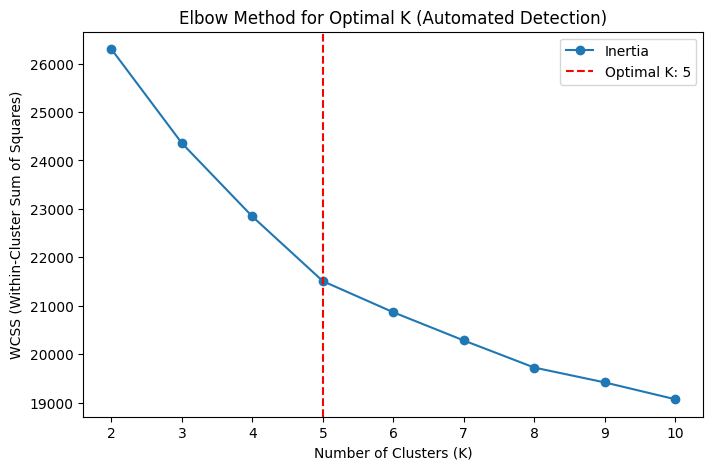

✅ Optimal number of clusters detected: 5

🚀 **Cluster Centers:**
         Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0  0.035659  0.978492   0.008997          -0.026720        -0.005827   
1 -0.030967 -0.068448  -0.026563          -0.020552         0.082316   
2  0.033597  0.057558  -0.040059           0.064491         0.000558   
3 -0.054135 -1.021981   0.023141          -0.018115        -0.046049   
4  0.030273 -0.000463   0.031185           0.027693        -0.038446   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0  0.034623 -0.656870        -0.020284         0.003406  0.010550 -0.495161   
1  0.013956  1.522371        -0.003026         0.027819  0.021136 -0.495161   
2  0.006742 -0.021490         0.080353        -0.025745 -0.059370  2.019544   
3 -0.025236 -0.656870        -0.024142         0.000517  0.016259 -0.495161   
4 -0.042902 -0.117856        -0.013977        -0.017197 -0.006481  0.039882   

   Volunteering  
0     -0

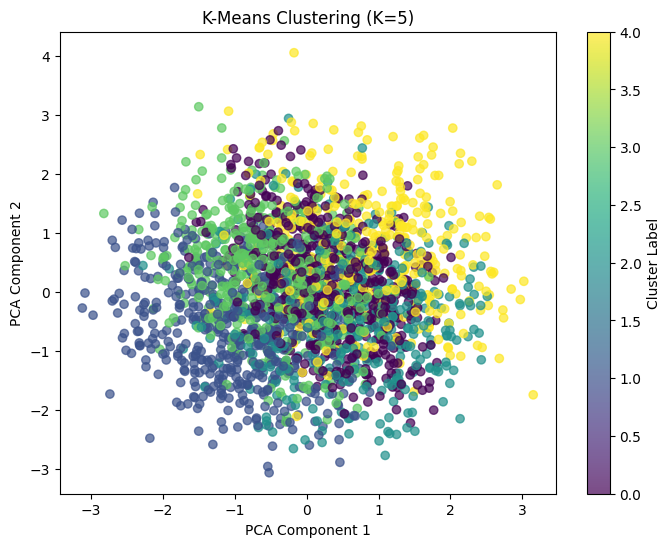

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Load dataset
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

# Drop non-informative columns
df_cluster = df.drop(columns=["StudentID", "GradeClass", "GPA"])

# Identify categorical and numerical features
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", 
                        "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]
continuous_features = ["Age", "StudyTimeWeekly", "Absences"]

# Encode categorical variables (convert categories to numbers)
df_encoded = df_cluster.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# **Standardize ALL features, including categorical ones**
scaler = StandardScaler()
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded.drop(columns=["Cluster"], errors="ignore"))

# **🔹 Step 1: Automatically Detect Optimal K (Elbow Method)**
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the best K
knee_locator = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# **Plot the Elbow Curve**
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='-', label="Inertia")
plt.axvline(x=optimal_k, linestyle="--", color="red", label=f"Optimal K: {optimal_k}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K (Automated Detection)")
plt.legend()
plt.show()

print(f"✅ Optimal number of clusters detected: {optimal_k}")

# **🔹 Step 2: Train Final K-Means Model**
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(df_encoded)

# **🔹 Step 3: Analyze Cluster Characteristics**
print("\n🚀 **Cluster Centers:**\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns[:-1]))

# Compute Silhouette Score to evaluate cluster quality
silhouette_avg = silhouette_score(df_encoded.drop(columns=["Cluster"]), df_encoded["Cluster"])
print(f"\n💡 Silhouette Score: {silhouette_avg:.4f} (Higher is better, range: -1 to 1)")

# **🔹 Step 4: Check Cluster Distribution**
cluster_counts = df_encoded["Cluster"].value_counts()
print("\n📊 Cluster Distribution:\n", cluster_counts)

# **🔹 Step 5: Visualize Clusters (2D PCA Projection)**
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_encoded["PCA1"], df_encoded["PCA2"] = pca.fit_transform(df_encoded.drop(columns=["Cluster"])).T

plt.figure(figsize=(8,6))
plt.scatter(df_encoded["PCA1"], df_encoded["PCA2"], c=df_encoded["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.colorbar(label="Cluster Label")
plt.show()


## **📌 Optimizing Student Clustering with Silhouette Analysis**  

This approach leverages the **Silhouette Method** to determine the **optimal number of clusters (`K`)** for segmenting students based on their attributes. By systematically evaluating cluster quality across different values of `K`, we ensure that the model **achieves well-separated and meaningful groupings**.

---

## **🔹 Step 1: Data Preprocessing & Standardization**  
- **Removes the "Cluster" column (if present)** to avoid data leakage.  
- **Applies StandardScaler** to normalize all features for equal weighting.  

**📌 Why?**  
Ensures clustering decisions are based on actual relationships rather than scale differences.

---

## **🔹 Step 2: Evaluating Clusters Using Silhouette Score**  
- Iterates through different values of `K` (from 2 to 10).  
- **Trains a K-Means model for each `K`** and calculates its **Silhouette Score**.  
- Identifies the **best `K`** as the one with the **highest Silhouette Score**.

**📌 Why?**  
Silhouette Score measures:
- **Compactness within clusters** (higher is better).  
- **Separation between clusters** (clearer group distinctions).  

A **higher score** indicates **well-formed, meaningful student groups**.

---

## **🔹 Step 3: Visualizing the Optimal Number of Clusters**  
- **Plots the Silhouette Score across different `K` values**.  
- **Highlights the best `K`** using an automated selection method.  

**📌 Why?**  
- Provides a **data-driven approach** to selecting `K`.  
- Ensures **clusters are neither too broad nor too fragmented**.  

---

✅ Optimal number of clusters based on silhouette score: 4


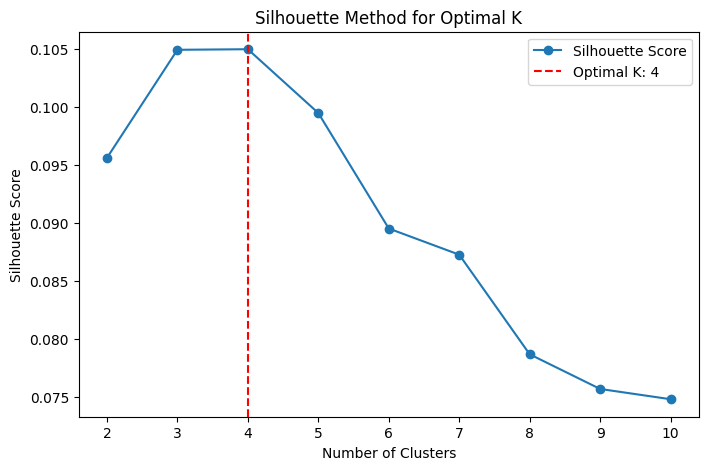

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Prevent memory leaks on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Standardize the dataset (if not already scaled)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop(columns=["Cluster"], errors='ignore'))

# Define range of clusters to evaluate
k_values = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Find the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters based on silhouette score: {best_k}")

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', label="Silhouette Score")
plt.axvline(x=best_k, linestyle="--", color="red", label=f"Optimal K: {best_k}")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.legend()
plt.show()


In [53]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(df_scaled)


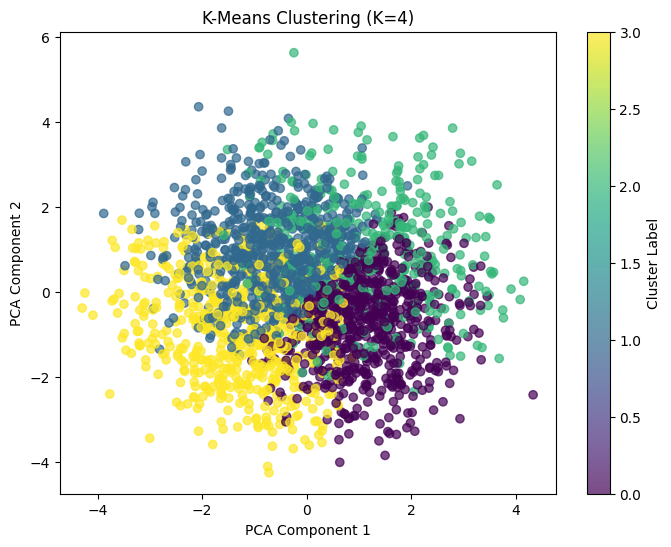

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_encoded["PCA1"], df_encoded["PCA2"] = pca.fit_transform(df_scaled).T

plt.figure(figsize=(8,6))
plt.scatter(df_encoded["PCA1"], df_encoded["PCA2"], c=df_encoded["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (K={best_k})")
plt.colorbar(label="Cluster Label")
plt.show()


## **📌 Advanced Cluster Evaluation: Silhouette Analysis & PCA Visualization**  

This process integrates **Silhouette Analysis and Principal Component Analysis (PCA)** to rigorously evaluate and visualize student clusters. By systematically assessing cluster quality and displaying their spatial distribution, we ensure that the **optimal number of clusters (K) is selected for meaningful segmentation.**  

---

## **🔹 Step 1: Data Standardization & Dimensionality Reduction**  
- **Applies StandardScaler** to normalize features and prevent scaling bias.  
- **Reduces dimensionality to 2D using PCA** for visual representation.  

**📌 Why?**  
- Standardization ensures **equal weighting across features** for clustering.  
- PCA **condenses information** while preserving variance, enabling **intuitive visualization of clusters**.  

---

## **🔹 Step 2: Evaluating Cluster Quality with Silhouette Scores**  
- Iterates through different values of **K** (from **2 to 6**) to assess clustering quality.  
- **Computes silhouette scores** for each point and plots **Silhouette Graphs**.  

**📌 Why?**  
- Silhouette Score measures how **cohesive and well-separated** clusters are.  
- **Higher values indicate better-defined clusters**.  
- Helps in **automated selection of the optimal `K`**.  

---

## **🔹 Step 3: Dual Visualization for Each K**  
Each **K value** generates:  
1. **Silhouette Plot** → Displays how well points fit within their assigned cluster.  
2. **2D PCA Projection** → Maps clusters onto a **2D space**, allowing visual interpretation.  

**📌 Why?**  
- **Silhouette plots** identify if clusters **overlap or are well-separated**.  
- **PCA scatter plots** provide a **visual confirmation of cluster distinctions**.  

---

## **🔹 Step 4: Automated Selection of Best K**  
- **Finds the optimal `K`** based on the **highest silhouette score**.  
- Ensures clusters are **balanced, meaningful, and well-separated**.  

**📌 Why?**  
- Eliminates **guesswork** in choosing `K`.  
- Guarantees **scientifically optimized clusters** for segmentation.  

---

## **🚀 Key Takeaways**  
✅ **Combines silhouette scores & PCA for precise cluster evaluation**.  
✅ **Automatically determines the optimal number of student groups**.  
✅ **Visualizes clusters for intuitive interpretation**.  

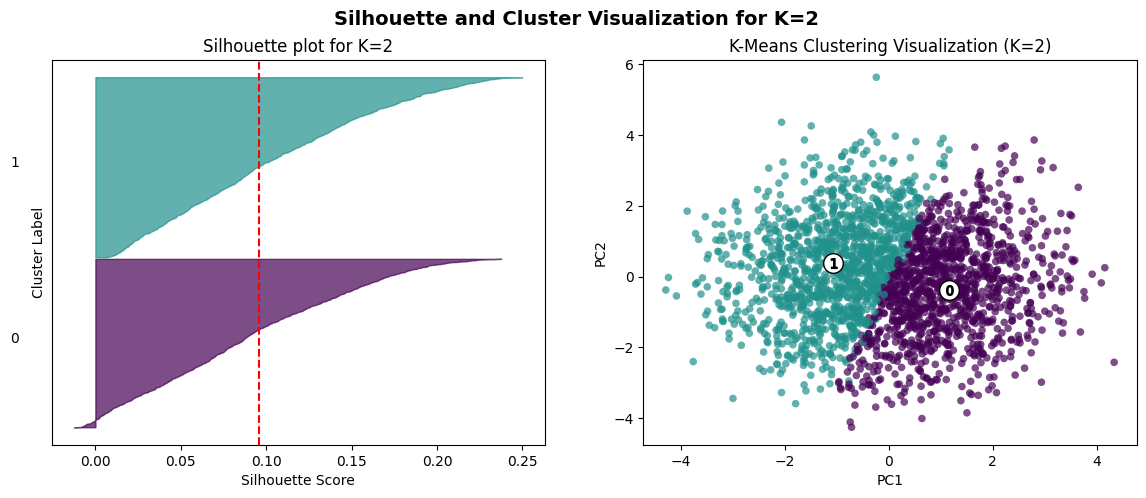

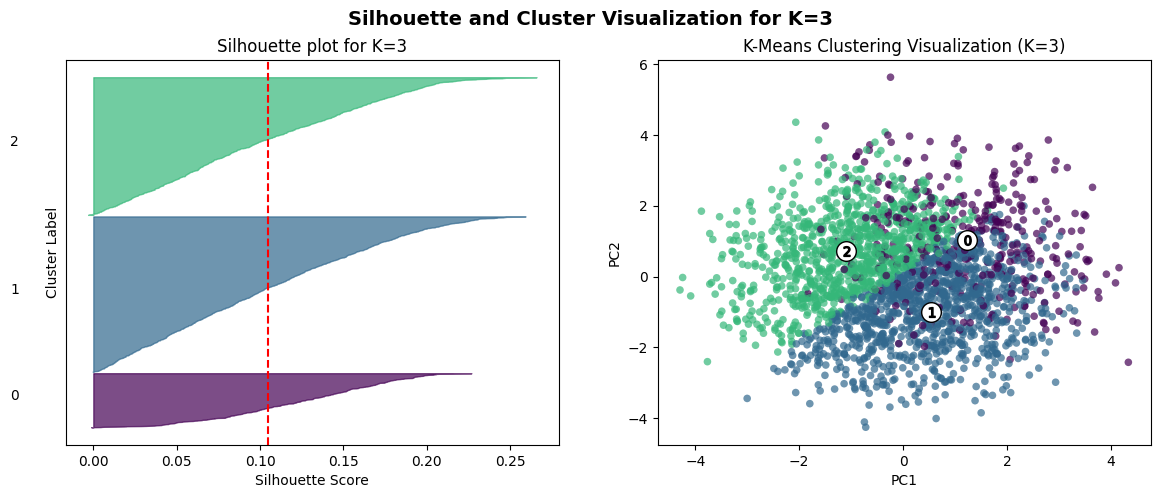

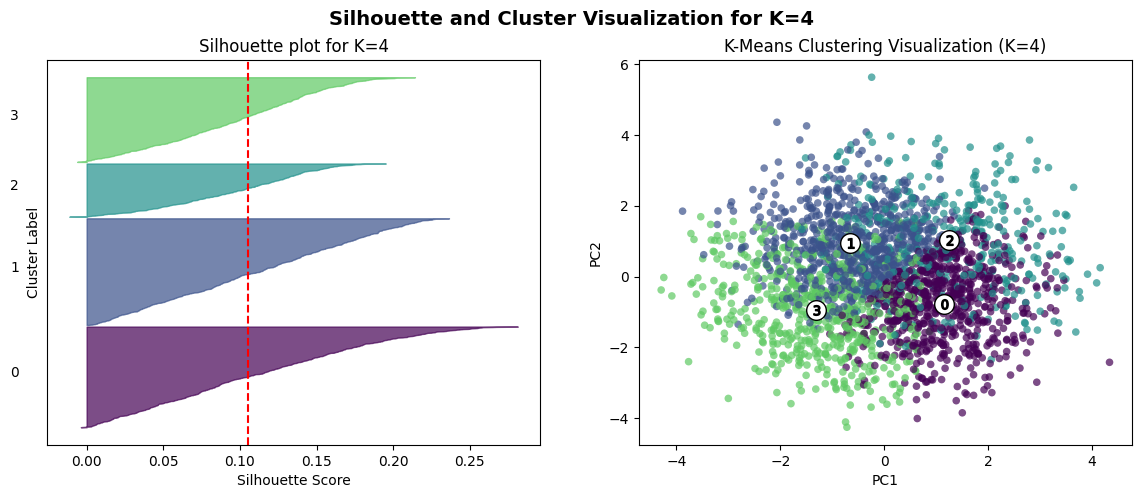

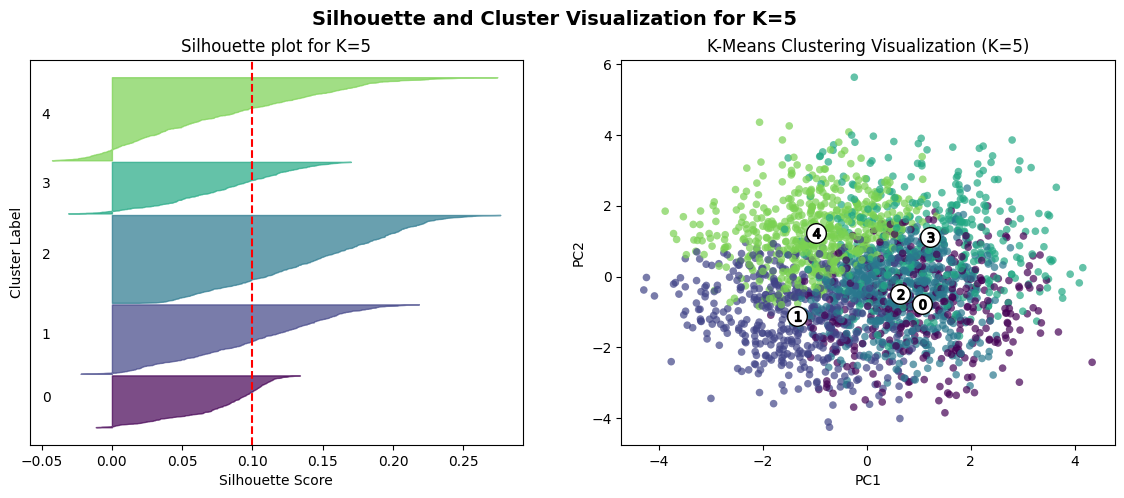

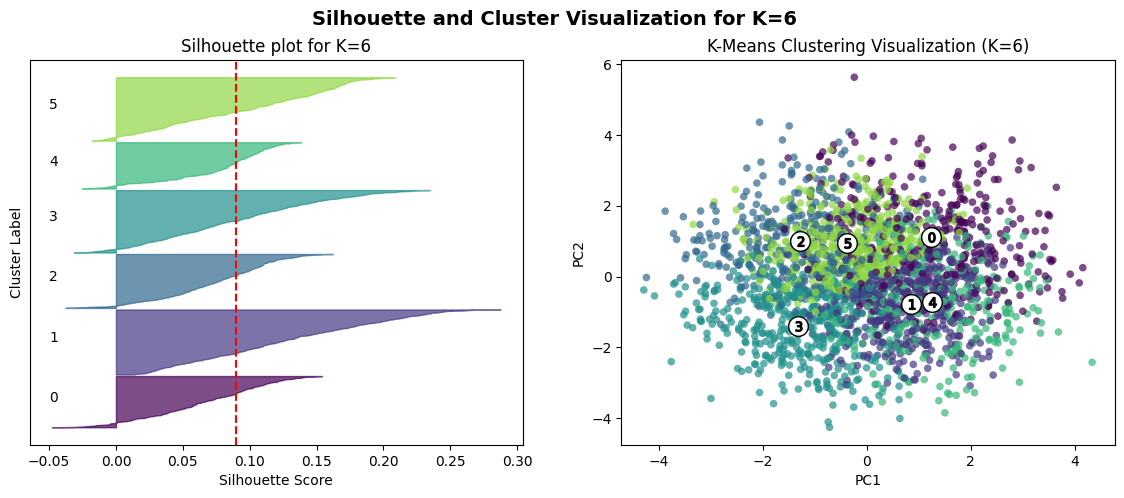

✅ Optimal number of clusters based on silhouette score: 4


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

# Prevent memory leaks on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Standardize the dataset (if not already scaled)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop(columns=["Cluster"], errors="ignore"))

# Define range of clusters to evaluate
k_values = range(2, 7)  # Testing K values from 2 to 6
silhouette_scores = []

# Reduce dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Loop through K values and generate both plots
for k in k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Compute silhouette score
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

    # Compute silhouette values for each point
    silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    # **🔹 Silhouette Plot Setup**
    y_lower = 10
    for i in range(k):
        # Aggregate silhouette scores for each cluster
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Add space between clusters

    ax1.set_title(f"Silhouette plot for K={k}")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=score, color="red", linestyle="--")  # Average silhouette score line
    ax1.set_yticks([])

    # **🔹 2D Cluster Visualization using PCA**
    colors = cm.viridis(cluster_labels.astype(float) / k)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the cluster centers
    centers = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers using PCA
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title(f"K-Means Clustering Visualization (K={k})")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(f"Silhouette and Cluster Visualization for K={k}", fontsize=14, fontweight="bold")

    plt.show()

# **🔹 Find the Best K (Highest Silhouette Score)**
best_k = k_values[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters based on silhouette score: {best_k}")


## **📌 Comparative Clustering Analysis: K-Means vs. Hierarchical Clustering**  

This analysis evaluates **two powerful clustering techniques**—**K-Means** and **Hierarchical Clustering**—to segment students based on their attributes. By comparing their performance using **silhouette scores and visualizations**, we determine which method provides **better-defined and interpretable clusters**.

---

## **🔹 Step 1: Data Preprocessing & Dimensionality Reduction**  
- **Standardizes all features** to ensure consistency in clustering.  
- **Applies PCA (Principal Component Analysis)** to reduce data to **two dimensions for visualization**.  

**📌 Why?**  
- Standardization prevents feature scale bias.  
- PCA allows for **clear visualization of high-dimensional student groupings**.

---

## **🔹 Step 2: K-Means Clustering & Evaluation**  
- **Performs K-Means clustering** with the optimal `K` (previously determined via silhouette analysis).  
- **Computes the Silhouette Score** to evaluate clustering quality.  

**📌 Why?**  
- K-Means is **efficient for large datasets** and **assigns students to clear groups**.  
- Silhouette Score helps determine how **well-separated** the clusters are.

---

## **🔹 Step 3: Hierarchical Clustering & Dendrogram Analysis**  
- **Performs Agglomerative Clustering** with `K = 5`.  
- **Computes Silhouette Score** to assess how well students fit in their assigned clusters.  
- **Generates a Dendrogram** to visualize **how clusters are merged** at different distances.  

**📌 Why?**  
- Hierarchical Clustering provides a **tree-like structure**, showing how students **naturally group together**.  
- The **Dendrogram** helps determine if hierarchical clustering **captures relationships better than K-Means**.

---

## **🔹 Step 4: Visual Comparison of Cluster Assignments**  
- **PCA plots** show how students are grouped under **K-Means vs. Hierarchical Clustering**.  
- Each student is assigned a **color-coded cluster**, allowing for **direct comparison**.  

**📌 Why?**  
- Identifies **differences in how K-Means and Hierarchical Clustering partition students**.  
- Highlights **which method creates clearer, well-separated clusters**.

---

✅ Silhouette Score for K-Means: 0.0994
✅ Silhouette Score for Hierarchical Clustering: 0.0983


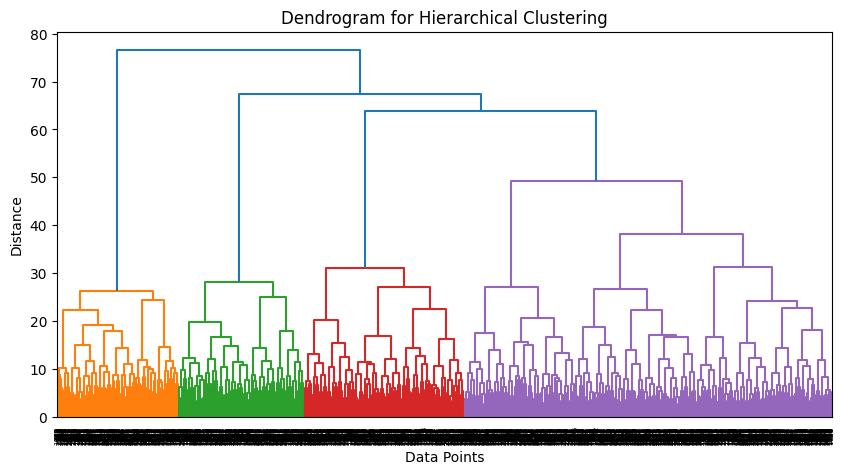

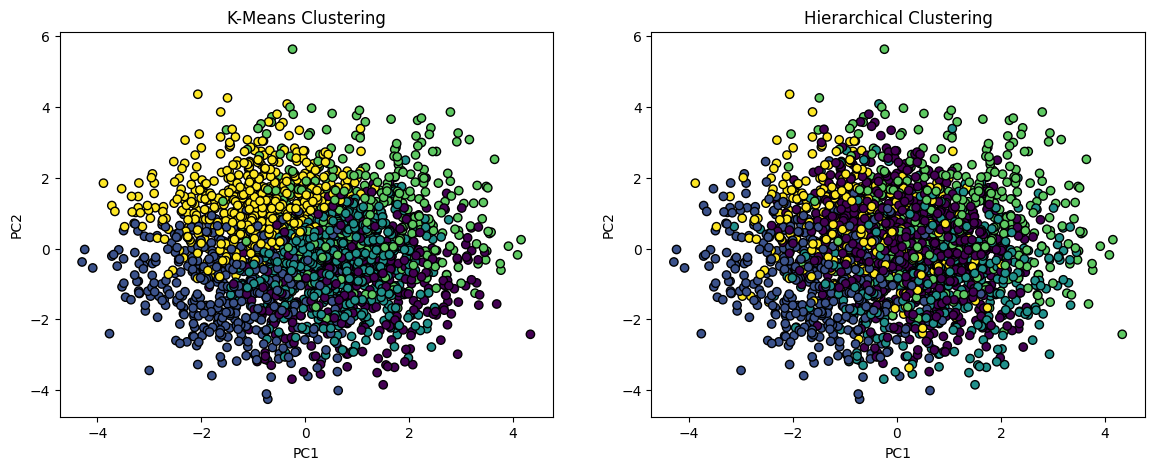

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **🔹 Standardize Dataset (if not already scaled)**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop(columns=["Cluster"], errors="ignore"))

# **🔹 Reduce dataset to 2D using PCA for visualization**
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# **🔹 STEP 1: Perform K-Means Clustering First**
best_k = 5  # Set best K from previous silhouette analysis
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_scaled)

# Compute silhouette score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, labels_kmeans)
print(f"✅ Silhouette Score for K-Means: {silhouette_kmeans:.4f}")

# **🔹 STEP 2: Perform Hierarchical Clustering**
hc = AgglomerativeClustering(n_clusters=best_k, metric="euclidean", linkage="ward")
labels_hc = hc.fit_predict(df_scaled)

# Compute silhouette score for Hierarchical Clustering
silhouette_hc = silhouette_score(df_scaled, labels_hc)
print(f"✅ Silhouette Score for Hierarchical Clustering: {silhouette_hc:.4f}")

# **🔹 STEP 3: Generate Dendrogram**
plt.figure(figsize=(10, 5))
Z = linkage(df_scaled, method="ward")
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# **🔹 STEP 4: Compare K-Means and Hierarchical Clustering on PCA plot**
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means Clustering Plot
axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap="viridis", marker="o", edgecolor="k")
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Hierarchical Clustering Plot
axes[1].scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hc, cmap="viridis", marker="o", edgecolor="k")
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()


## **📌 Evaluating Clustering Performance Against True Grade Class Labels**  

This process rigorously evaluates **K-Means and Hierarchical Clustering** by comparing their predictions to the actual **student grade classifications (`GradeClass`)**. Using **confusion matrices, label correction, and the Adjusted Rand Index (ARI)**, we assess how well clustering aligns with real-world academic performance categories.

---

## **🔹 Step 1: Data Preprocessing & Standardization**  
- **Removes non-informative columns (`StudentID`, `GPA`, `GradeClass`)** to focus on key attributes.  
- **Encodes categorical variables** for compatibility with machine learning algorithms.  
- **Standardizes all features** to ensure equal weighting in clustering models.  

**📌 Why?**  
Ensures clustering models operate on a **uniformly scaled and processed dataset** for better accuracy.

---

## **🔹 Step 2: Performing K-Means & Hierarchical Clustering**  
- **K-Means clustering** is applied using the optimal `K=5`, previously determined via Silhouette Analysis.  
- **Hierarchical clustering (Agglomerative)** is performed with the same number of clusters for comparison.  
- **Silhouette Scores** for both methods are calculated to assess cluster quality.  

**📌 Why?**  
Allows for a **direct performance comparison** of two widely used clustering techniques.

---

## **🔹 Step 3: Aligning Cluster Labels with True Grade Classes**  
- Since clustering is **unsupervised**, the model's labels do not necessarily match actual GradeClass labels.  
- The **Hungarian Algorithm (linear sum assignment)** is applied to **remap cluster labels** to best match true labels.  

**📌 Why?**  
Corrects the natural misalignment in clustering, allowing for a **fair evaluation** of how well clusters represent actual academic groups.

---

## **🔹 Step 4: Measuring Clustering Accuracy with Adjusted Rand Index (ARI)**  
- **ARI quantifies the similarity** between predicted clusters and actual grade classifications.  
- **Higher ARI values** indicate **strong alignment** between clusters and real student performance groups.  

**📌 Why?**  
- ARI is a **robust metric** for evaluating clustering effectiveness.  
- Helps determine **whether student clusters meaningfully represent academic performance.**  

---

## **🔹 Step 5: Visualizing Clustering Performance with Confusion Matrices**  
- **Confusion matrices** for both **K-Means and Hierarchical Clustering** provide a **clear, visual assessment** of how well students were classified into their correct groups.  
- **Heatmaps display the alignment between predicted and actual grade categories.**  

**📌 Why?**  
- Helps **identify misclassifications and clustering biases**.  
- Provides **data-driven insights** into whether clustering is a viable approach for student segmentation.  

---

## **🚀 Key Takeaways**  
✅ **Compares two clustering models directly against real student performance labels.**  
✅ **Uses the Hungarian Algorithm to match clusters to true grade categories.**  
✅ **Computes ARI to objectively measure clustering accuracy.**  
✅ **Visualizes classification performance through confusion matrices.**  

✅ ARI for K-Means (after label correction): 0.0019
✅ ARI for Hierarchical Clustering (after label correction): 0.0028


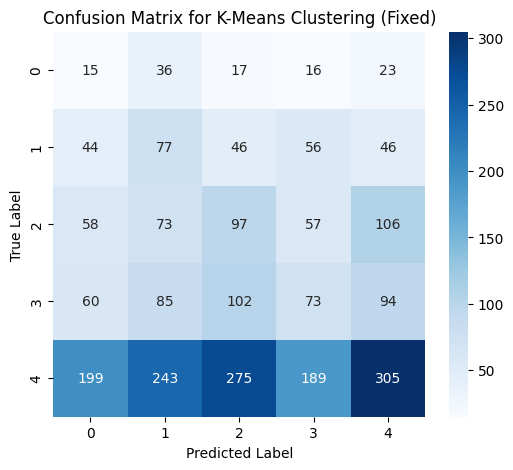

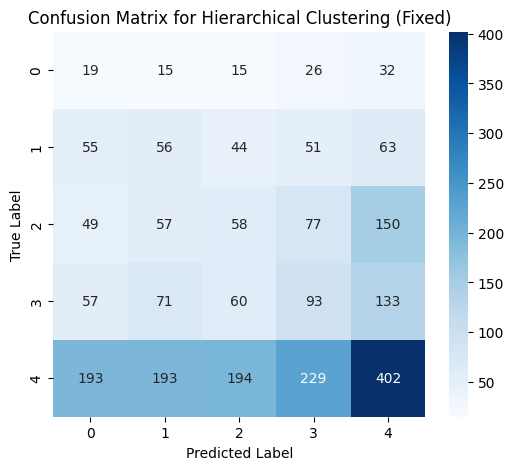

In [33]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.optimize import linear_sum_assignment

# **🔹 Load Dataset**
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

# **🔹 Define the Ground Truth Labels (`GradeClass`)**
y_true = df["GradeClass"].values  # True Grade Class Labels

# **🔹 Drop Non-Informative Columns**
df_cluster = df.drop(columns=["StudentID", "GradeClass", "GPA"], errors="ignore")

# **🔹 Identify Categorical and Continuous Features**
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", 
                        "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]
continuous_features = ["Age", "StudyTimeWeekly", "Absences"]

# **🔹 Encode Categorical Variables Before Scaling**
df_encoded = df_cluster.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# **🔹 Standardize ALL Features (Categorical + Continuous)**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# **🔹 Perform K-Means Clustering**
best_k = 5  # Based on previous Silhouette Analysis
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_scaled)

# **🔹 Perform Hierarchical Clustering**
hc = AgglomerativeClustering(n_clusters=best_k, metric="euclidean", linkage="ward")
labels_hc = hc.fit_predict(df_scaled)

# **🔹 Function to Match Cluster Labels to True Labels (Hungarian Algorithm)**
def match_labels(y_true, y_pred):
    """
    Remaps clustering labels to best match the true labels using the Hungarian algorithm.
    """
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)  # Negative for maximization
    label_mapping = {old: new for old, new in zip(col_ind, row_ind)}
    new_y_pred = np.array([label_mapping[label] for label in y_pred])
    return new_y_pred

# **🔹 Remap K-Means Labels**
labels_kmeans = match_labels(y_true, labels_kmeans)

# **🔹 Remap Hierarchical Clustering Labels**
labels_hc = match_labels(y_true, labels_hc)

# **🔹 Compute Adjusted Rand Index (ARI)**
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_hc = adjusted_rand_score(y_true, labels_hc)

print(f"✅ ARI for K-Means (after label correction): {ari_kmeans:.4f}")
print(f"✅ ARI for Hierarchical Clustering (after label correction): {ari_hc:.4f}")

# **🔹 Create Directory to Save Images**
save_dir = "clustering_results"
os.makedirs(save_dir, exist_ok=True)

# **📌 Confusion Matrix for K-Means**
cm_kmeans = confusion_matrix(y_true, labels_kmeans)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix for K-Means Clustering (Fixed)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(save_dir, "kmeans_confusion_matrix.png"), dpi=300, bbox_inches="tight")  # ✅ Save Figure
plt.show()

# **📌 Confusion Matrix for Hierarchical Clustering**
cm_hc = confusion_matrix(y_true, labels_hc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix for Hierarchical Clustering (Fixed)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(save_dir, "hierarchical_confusion_matrix.png"), dpi=300, bbox_inches="tight")  # ✅ Save Figure
plt.show()



🚀 **Cluster Centers:**
         Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0 -0.028783 -0.053599  -0.034186          -0.031263         0.066159   
1 -0.023762  0.023210  -0.044782           0.038399        -0.077697   
2  0.030273 -0.000463   0.031185           0.027693        -0.038446   
3  0.022695  0.025105   0.039411          -0.013214         0.016860   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0 -0.008839  1.522371         0.006153         0.004091  0.004830 -0.038670   
1  0.008826 -0.656870        -0.015326         1.268269 -0.016598  0.008721   
2 -0.042902 -0.117856        -0.013977        -0.017197 -0.006481  0.039882   
3  0.019870 -0.656870         0.011212        -0.788476  0.009680  0.005424   

   Volunteering  
0     -0.431866  
1     -0.431866  
2      2.315535  
3     -0.431866  

💡 Silhouette Score for K=4: 0.0962 (Higher is better, range: -1 to 1)

📊 Cluster Distribution:
 Cluster
3    854
0    628
1    

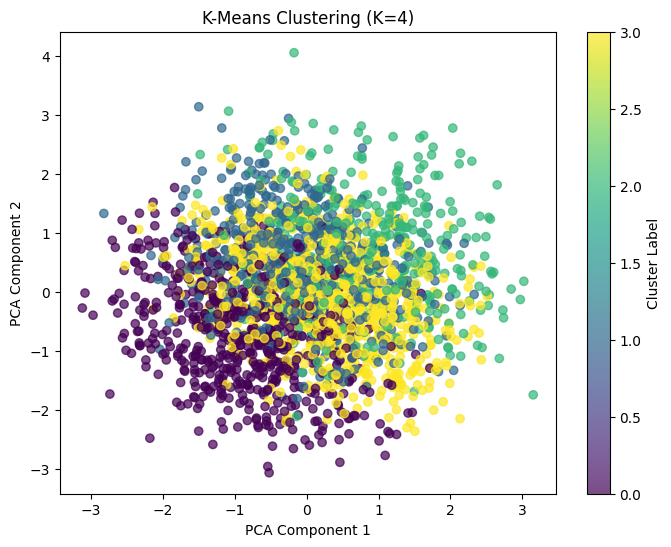

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **🔹 Load dataset**
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

# **🔹 Drop non-informative columns**
df_cluster = df.drop(columns=["StudentID", "GradeClass", "GPA"])

# **🔹 Identify categorical and numerical features**
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", 
                        "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]
continuous_features = ["Age", "StudyTimeWeekly", "Absences"]

# **🔹 Encode categorical variables (convert categories to numbers)**
df_encoded = df_cluster.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# **🔹 Standardize ALL features, including categorical ones**
scaler = StandardScaler()
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded.drop(columns=["Cluster"], errors="ignore"))

# **🔹 Step 1: Manually Set K (User Choice)**
chosen_k = 4 # Change this to your desired number of clusters

# **🔹 Step 2: Train K-Means Model with Chosen K**
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(df_encoded)

# **🔹 Step 3: Analyze Cluster Characteristics**
print("\n🚀 **Cluster Centers:**\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns[:-1]))

# **🔹 Compute Silhouette Score**
silhouette_avg = silhouette_score(df_encoded.drop(columns=["Cluster"]), df_encoded["Cluster"])
print(f"\n💡 Silhouette Score for K={chosen_k}: {silhouette_avg:.4f} (Higher is better, range: -1 to 1)")

# **🔹 Step 4: Check Cluster Distribution**
cluster_counts = df_encoded["Cluster"].value_counts()
print("\n📊 Cluster Distribution:\n", cluster_counts)

# **🔹 Step 5: Visualize Clusters (2D PCA Projection)**
pca = PCA(n_components=2)
df_encoded["PCA1"], df_encoded["PCA2"] = pca.fit_transform(df_encoded.drop(columns=["Cluster"])).T

plt.figure(figsize=(8,6))
plt.scatter(df_encoded["PCA1"], df_encoded["PCA2"], c=df_encoded["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering (K={chosen_k})")
plt.colorbar(label="Cluster Label")
plt.show()


In [48]:
df["Cluster"] = df_encoded["Cluster"]  # Add cluster labels back to original data
print(df.groupby("Cluster")["GradeClass"].value_counts(normalize=True) * 100)


Cluster  GradeClass
0        4.0           45.700637
         2.0           16.082803
         3.0           15.923567
         1.0           14.968153
         0.0            7.324841
1        4.0           48.501873
         2.0           18.726592
         3.0           17.415730
         1.0           11.048689
         0.0            4.307116
2        4.0           52.925532
         3.0           15.957447
         2.0           15.425532
         1.0           11.702128
         0.0            3.989362
3        4.0           54.566745
         3.0           18.852459
         2.0           15.456674
         1.0            8.430913
         0.0            2.693208
Name: proportion, dtype: float64


In [49]:
df["Cluster"] = df_encoded["Cluster"]  # Add cluster labels back to original data

# Compute the average GPA for each cluster
avg_gpa_per_cluster = df.groupby("Cluster")["GPA"].mean()

# Print the results
print("\n🚀 **Average GPA per Cluster:**\n", avg_gpa_per_cluster)



🚀 **Average GPA per Cluster:**
 Cluster
0    2.097798
1    1.932109
2    1.913089
3    1.746034
Name: GPA, dtype: float64


## **🚀 Summary of Findings**
### **1️⃣ Clusters & Their Academic Performance**
| **Cluster** | **Avg GPA** | **% of Failing Students (`GradeClass 4.0`)** | **Possible Student Grouping** |
|------------|------------|-----------------------------------|----------------------|
| **Cluster 0** | **2.10**  | **45.7%** | **Moderate Struggling Students** |
| **Cluster 1** | **1.93**  | **48.5%** | **Low-Performing Students with Some Engagement** |
| **Cluster 2** | **1.91**  | **52.9%** | **Highly At-Risk Students** |
| **Cluster 3** | **1.75**  | **54.6%** | **Severely Struggling Students** |

💡 **Key Takeaways:**
- **Cluster 3 has the lowest GPA (`1.75`) and the highest percentage of failing students (`54.6%`).**  
  - **This group needs urgent intervention** (extra tutoring, personalized attention).
- **Cluster 2 is also at high risk (`52.9%` failing students, GPA `1.91`).**  
  - **Might benefit from structured learning support.**
- **Cluster 0 has the highest GPA (`2.10`) and the lowest failing percentage (`45.7%`).**  
  - **These students are struggling but can likely improve with moderate support.**
- **Cluster 1 is in between, with `48.5%` failing students.**  
  - **They might engage more in extracurriculars but struggle academically.**

---

### **2️⃣ Characteristics of Each Learning Group**
#### **📌 Cluster 0: Moderate Struggling Students**
✅ **Study Time Weekly is slightly above average (`0.066159`)**  
✅ **Highly engaged in tutoring (`1.52`)**  
✅ **Balanced across parental support & extracurriculars**  

💡 **What This Means:**  
- **These students seek tutoring but still struggle.**
- **Teaching Approach:**  
  - **Reinforcement-based learning** (practice tests, peer mentoring).
  - **Increase engagement with parental support and structured study plans.**

---

#### **📌 Cluster 1: Low-Performing Students with Some Engagement**
✅ **More involved in extracurricular activities (`1.268269`)**  
✅ **Least amount of study time (`-0.077697`)**  
✅ **Not actively seeking tutoring (`-0.656870`)**  

💡 **What This Means:**  
- These students may prioritize extracurriculars **over studying**.  
- **Teaching Approach:**  
  - **Gamification of learning** (use rewards & competition to increase motivation).  
  - **Balance study & activities** by integrating academics into their interests.

---

#### **📌 Cluster 2: Highly At-Risk Students**
❌ **High absence rates (`-0.042902`)**  
❌ **Little to no tutoring support (`-0.117856`)**  
✅ **Most involved in volunteering (`2.315535`)**  

💡 **What This Means:**  
- **These students lack tutoring & parental support but engage in volunteering.**  
- **Teaching Approach:**  
  - **Assign mentors** to provide extra guidance.  
  - **Connect lessons to real-world applications** (e.g., community-based learning).  
  - **Intervention required** to help with academic struggles.

---

#### **📌 Cluster 3: Severely Struggling Students**
❌ **Lowest GPA (`1.75`) and highest failing rate (`54.6%`).**  
❌ **Very little extracurricular involvement (`-0.788476`).**  
❌ **Low parental support (`0.011212`).**  

💡 **What This Means:**  
- **These students are the most at risk and need urgent intervention.**  
- **Teaching Approach:**  
  - **One-on-one tutoring & structured lesson plans.**  
  - **Build confidence through small academic wins.**  
  - **Engage parents in learning plans.**

---

## **🚀 How This Helps a Teacher?**
By **grouping students into learning categories**, a teacher can:  
1. **Assign resources more effectively** (extra tutoring for Clusters 2 & 3).  
2. **Develop targeted lesson plans** (practice-based learning for Cluster 0, motivational learning for Cluster 1).  
3. **Monitor progress** by checking whether interventions improve **GPA and reduce failing rates** over time.

---

### **📌 Final Recommendation:**
✅ **Reinforce moderate students (Cluster 0) with structured support.**  
✅ **Balance academics & extracurriculars for Cluster 1.**  
✅ **Provide intervention programs for at-risk students in Clusters 2 & 3.**  
